<a href="https://colab.research.google.com/github/RumyantsevaAlena/parthDZ/blob/main/FinishHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Данные были извлечены с платформы kaggle (https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/code). В этом датасете собраны данные о прогнозирование рисков для здоровья беременных пациенток.


In [26]:
df = pd.read_csv('Maternal_Health_Risk_Data_Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Для удобства перведем градусы фаренгейта в градусы цельсия и перепеишем данные в новый столбец, вставив его вместо столбца со старыми данными

In [27]:
def fahrenheit_to_celsius(f):
    return round((f - 32) * 5/9, 1)

# Применение функции к столбцу 'BodyTemp'
df['Body_Temp'] = df['BodyTemp'].apply(fahrenheit_to_celsius)

# Удаление исходного столбца 'BodyTemp'
df = df.drop('BodyTemp', axis=1)
columns_order = list(df.columns)
new_order = columns_order[:4] + ['Body_Temp'] + columns_order[4:-1]

# Создание нового датафрейма с новым порядком столбцов
df = df[new_order]

df

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,high risk
1,35,140,90,13.0,36.7,70,high risk
2,29,90,70,8.0,37.8,80,high risk
3,30,140,85,7.0,36.7,70,high risk
4,35,120,60,6.1,36.7,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.7,80,high risk
1010,55,120,90,18.0,36.7,60,high risk
1011,35,85,60,19.0,36.7,86,high risk
1012,43,120,90,18.0,36.7,70,high risk


Очистим данные столбца RiskLevel, чтобы потом заполнить его автоматически, используя разметку на основе правил и сохраним полученный файл

In [28]:
df['RiskLevel'] = ""

df.to_csv('HW_9.csv', index=False)

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [29]:
df = pd.read_csv('HW_9.csv')
df

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,NaN
1,35,140,90,13.0,36.7,70,NaN
2,29,90,70,8.0,37.8,80,NaN
3,30,140,85,7.0,36.7,70,NaN
4,35,120,60,6.1,36.7,76,NaN
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.7,80,NaN
1010,55,120,90,18.0,36.7,60,NaN
1011,35,85,60,19.0,36.7,86,NaN
1012,43,120,90,18.0,36.7,70,NaN


In [30]:
# Разделим файл на 2 подмножества для разметки автоматически 95% и вручную 5%
from sklearn.model_selection import train_test_split

subset_auto, subset_manual = train_test_split(df, test_size=0.05, random_state=42)

# Сохраним второе подмножество
subset_manual.to_csv('subset_manual.csv', index=False)


In [31]:
# Определим под 1 подмножество правила
subset_auto

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
580,24,120,80,7.5,36.7,66,NaN
286,23,120,90,7.7,36.7,60,NaN
101,25,120,80,6.8,36.7,66,NaN
497,19,120,80,7.0,36.7,70,NaN
732,30,120,80,6.9,38.3,76,NaN
...,...,...,...,...,...,...,...
106,50,140,90,15.0,36.7,90,NaN
270,22,120,90,7.0,36.7,82,NaN
860,17,90,63,6.9,38.3,70,NaN
435,65,130,80,15.0,36.7,86,NaN


In [32]:
# Присвоение начальных меток
subset_auto['RiskLevel'] = 'низкий риск'

# Условия для высокого риска
subset_auto.loc[subset_auto['Age'] < 18, 'RiskLevel'] = 'высокий риск'
subset_auto.loc[(subset_auto['Age'] >= 18) & (subset_auto['Age'] <= 45) & ((subset_auto['SystolicBP'] > 140) | (subset_auto['DiastolicBP'] > 90) | (subset_auto['BS'] > 140) | (subset_auto['Body_Temp'] > 38) | (subset_auto['HeartRate'] > 100)), 'RiskLevel'] = 'высокий риск'

# Условия для среднего риска
subset_auto.loc[(subset_auto['Age'] >= 35) & (subset_auto['Age'] <= 50) & ((subset_auto['SystolicBP'] > 120) | (subset_auto['DiastolicBP'] > 80) | (subset_auto['BS'] > 120) | (subset_auto['Body_Temp'] > 37.5) | (subset_auto['HeartRate'] > 90)), 'RiskLevel'] = 'средний риск'

subset_auto.head(20)

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
580,24,120,80,7.5,36.7,66,низкий риск
286,23,120,90,7.7,36.7,60,низкий риск
101,25,120,80,6.8,36.7,66,низкий риск
497,19,120,80,7.0,36.7,70,низкий риск
732,30,120,80,6.9,38.3,76,высокий риск
468,25,140,100,6.8,36.7,80,высокий риск
705,21,100,50,6.8,36.7,60,низкий риск
30,20,100,90,7.1,36.7,88,низкий риск
365,22,120,90,7.8,36.7,82,низкий риск
884,32,120,90,6.8,36.7,70,низкий риск


In [33]:
subset_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 580 to 102
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          963 non-null    int64  
 1   SystolicBP   963 non-null    int64  
 2   DiastolicBP  963 non-null    int64  
 3   BS           963 non-null    float64
 4   Body_Temp    963 non-null    float64
 5   HeartRate    963 non-null    int64  
 6   RiskLevel    963 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 60.2+ KB


In [34]:
subset_auto.to_csv('subset_auto.csv', index=False)

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [35]:
df_manually = pd.read_csv('subset_manual.csv', engine='python', encoding='utf-8', on_bad_lines='skip', encoding_errors='ignore')
df_manually.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,29,130,70,7.7,36.7,78,NaN
1,30,140,100,15.0,36.7,70,NaN
2,50,140,95,17.0,36.7,60,NaN
3,23,120,90,7.5,36.7,60,NaN
4,17,120,80,7.5,38.9,76,NaN


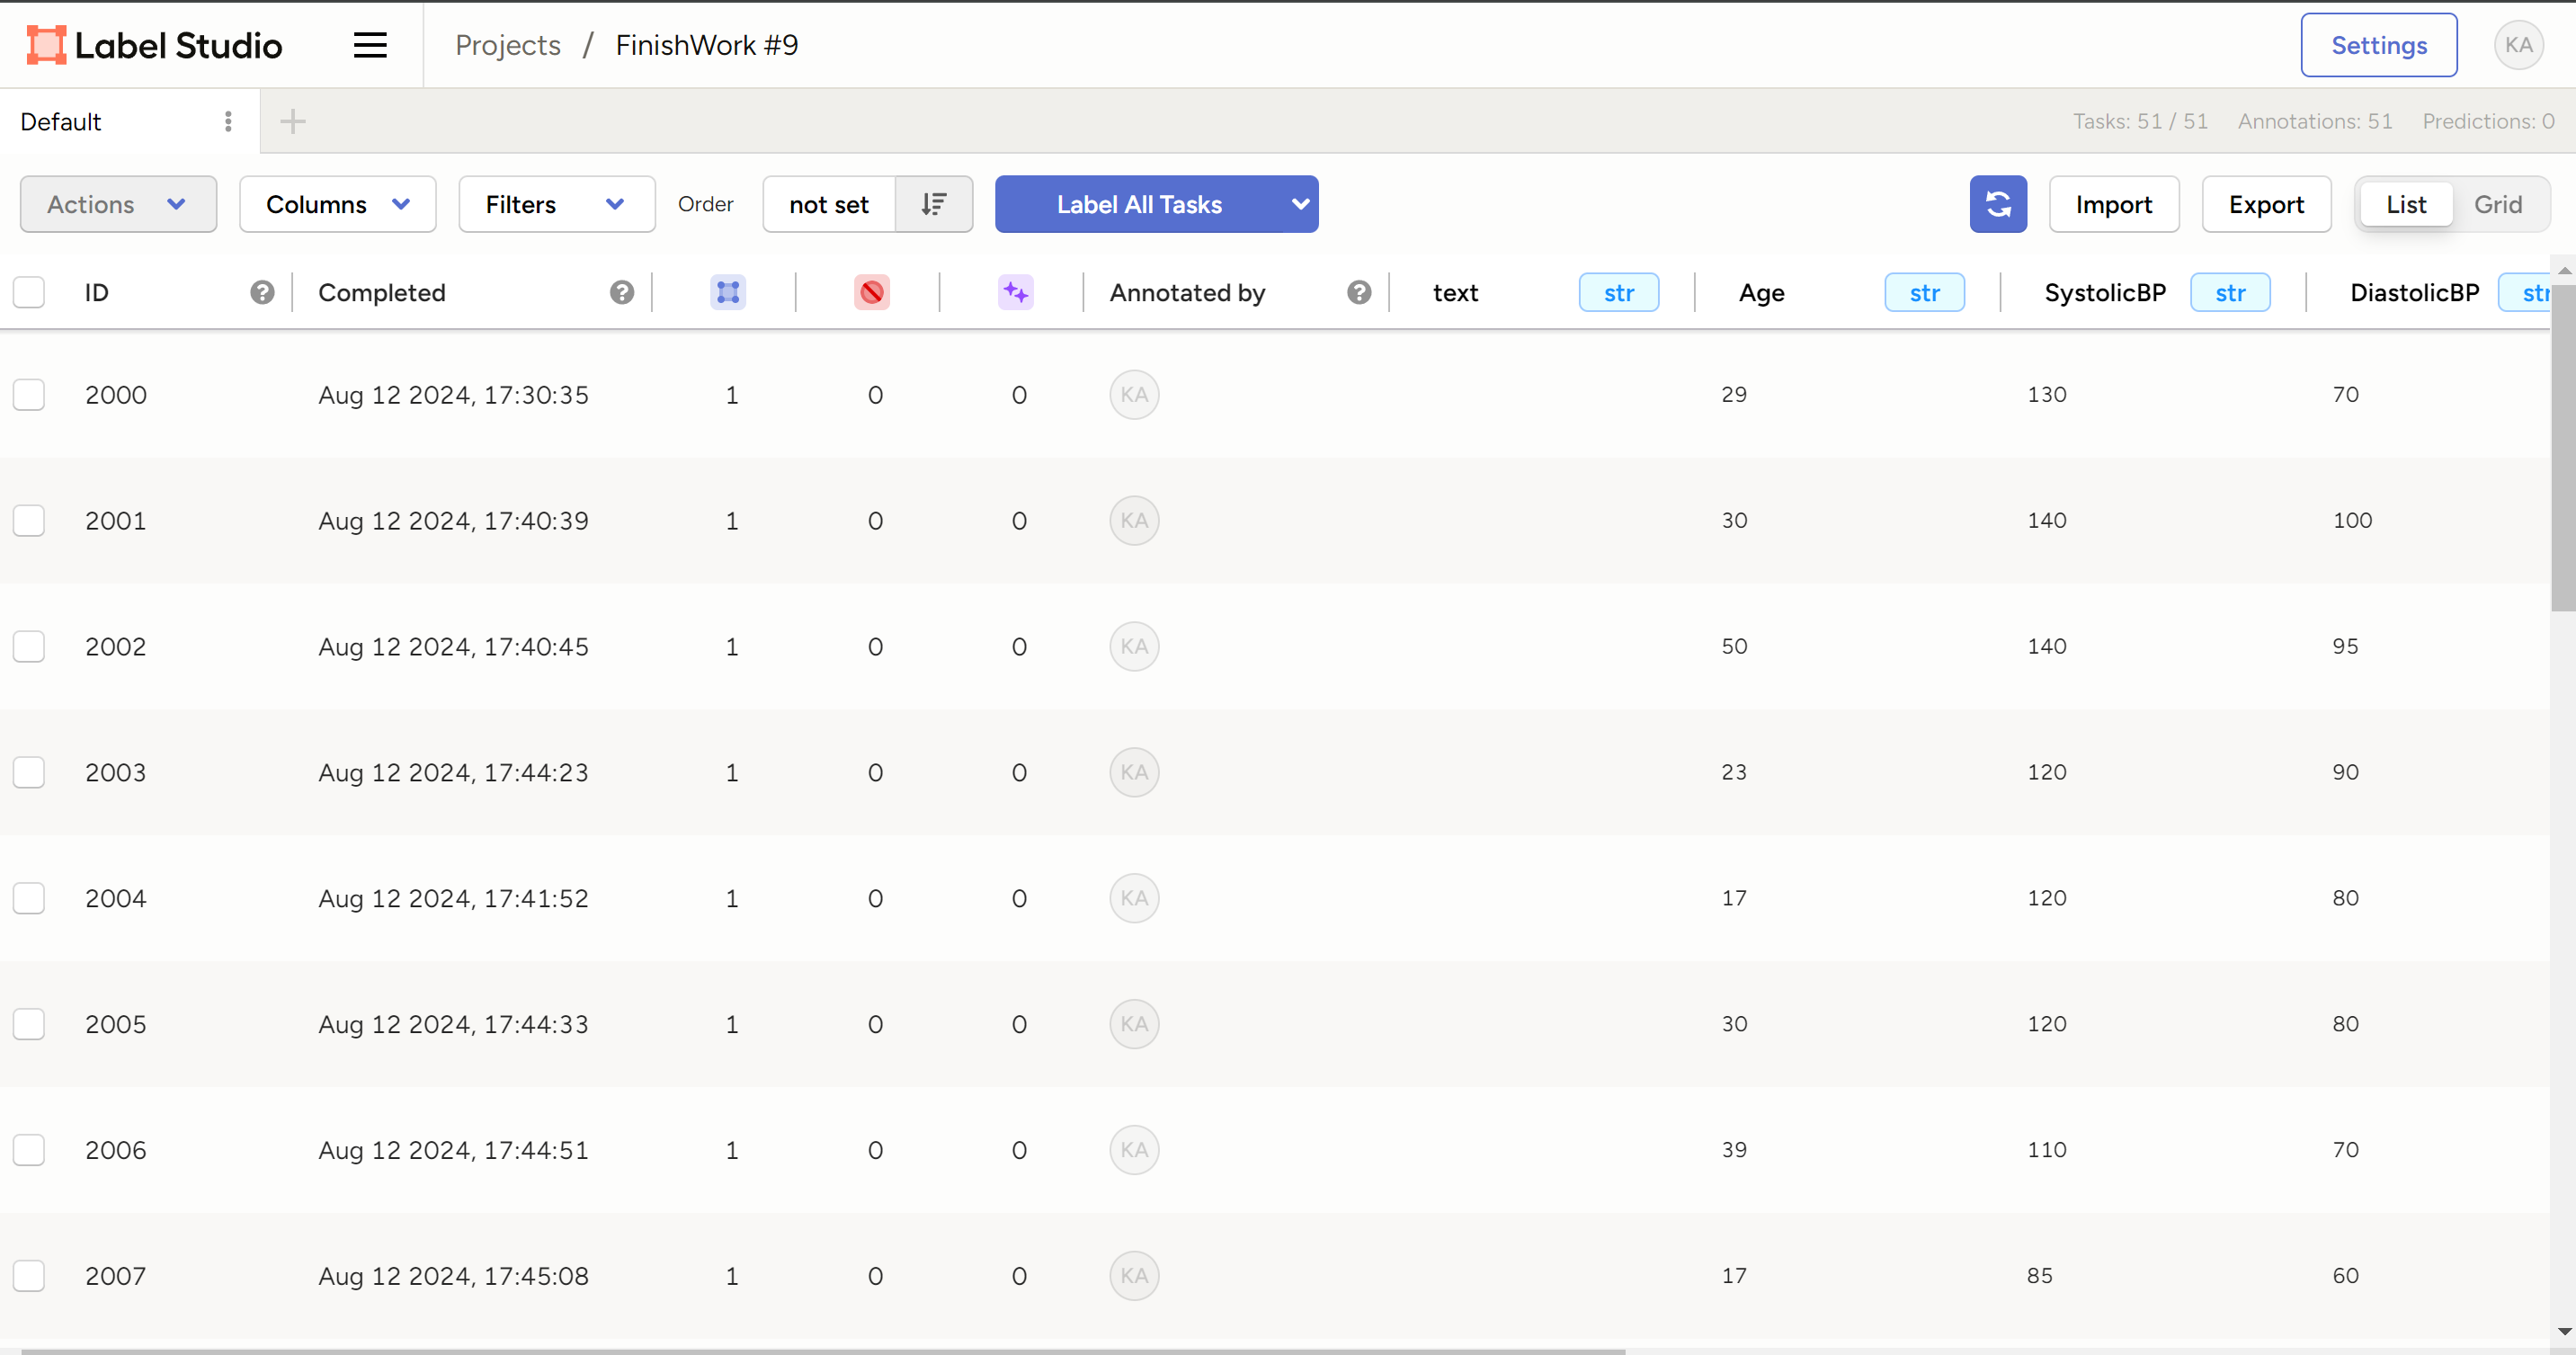

In [36]:
df_man = pd.read_csv('subset_manual_check.csv')
df_man.head()

,Age,BS,Body_Temp,DiastolicBP,HeartRate,RiskLevel,SystolicBP,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,29,7.7,36.7,70,78,NaN,130,1,1,2024-08-12T14:30:35.305965Z,2000,46.836,низкий,2024-08-12T14:30:35.305965Z
1,30,15.0,36.7,100,70,NaN,140,2,1,2024-08-12T14:40:39.737057Z,2001,8.196,низкий,2024-08-12T14:40:39.737057Z
2,50,17.0,36.7,95,60,NaN,140,3,1,2024-08-12T14:40:45.044530Z,2002,3.736,низкий,2024-08-12T14:40:45.044530Z
3,23,7.5,36.7,90,60,NaN,120,5,1,2024-08-12T14:44:23.051418Z,2003,3.532,средний,2024-08-12T14:44:23.051418Z
4,17,7.5,38.9,80,76,NaN,120,4,1,2024-08-12T14:41:52.383773Z,2004,65.989,средний,2024-08-12T14:41:52.383773Z


In [37]:
# Переопределим порядок столбцов для последующего объединения двух подмножеств
redefine = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'Body_Temp', 'HeartRate', 'RiskLevel', 'annotation_id', 'annotator', 'created_at', 'id','lead_time', 'sentiment', 'updated_at']
df_man = df_man[redefine]

# сохраним новую версию файла
df_man.to_csv('subset_manual_check_1.csv', index=False)
df_man.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,29,130,70,7.7,36.7,78,NaN,1,1,2024-08-12T14:30:35.305965Z,2000,46.836,низкий,2024-08-12T14:30:35.305965Z
1,30,140,100,15.0,36.7,70,NaN,2,1,2024-08-12T14:40:39.737057Z,2001,8.196,низкий,2024-08-12T14:40:39.737057Z
2,50,140,95,17.0,36.7,60,NaN,3,1,2024-08-12T14:40:45.044530Z,2002,3.736,низкий,2024-08-12T14:40:45.044530Z
3,23,120,90,7.5,36.7,60,NaN,5,1,2024-08-12T14:44:23.051418Z,2003,3.532,средний,2024-08-12T14:44:23.051418Z
4,17,120,80,7.5,38.9,76,NaN,4,1,2024-08-12T14:41:52.383773Z,2004,65.989,средний,2024-08-12T14:41:52.383773Z


Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [38]:
subset1 = pd.read_csv('subset_auto.csv')
subset2 = pd.read_csv('subset_manual_check_1.csv')

# Перенесем данные из столбца sentiment в столбец RiskLevel
subset2['RiskLevel'] = subset2['sentiment']

#Удалим ненужные нам столбцы
subset2.drop('annotation_id', axis=1, inplace=True)
subset2.drop('annotator', axis=1, inplace=True)
subset2.drop('created_at', axis=1, inplace=True)
subset2.drop('id', axis=1, inplace=True)
subset2.drop('lead_time', axis=1, inplace=True)
subset2.drop('sentiment', axis=1, inplace=True)
subset2.drop('updated_at', axis=1, inplace=True)

subset2.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,29,130,70,7.7,36.7,78,низкий
1,30,140,100,15.0,36.7,70,низкий
2,50,140,95,17.0,36.7,60,низкий
3,23,120,90,7.5,36.7,60,средний
4,17,120,80,7.5,38.9,76,средний


In [39]:
# Объедините два подмножества в один набор данных
merged_dataset = pd.concat([subset1, subset2], ignore_index=True)

# Сохраните объединенный набор данных в файл, замените 'merged_dataset.csv' на желаемое имя файла
merged_dataset.to_csv('merged_dataset.csv', index=False)

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Пример модели

# чтение нашего объединенного файла
df_merge = pd.read_csv('merged_dataset.csv')
df_merge

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,24,120,80,7.50,36.7,66,низкий риск
1,23,120,90,7.70,36.7,60,низкий риск
2,25,120,80,6.80,36.7,66,низкий риск
3,19,120,80,7.00,36.7,70,низкий риск
4,30,120,80,6.90,38.3,76,высокий риск
...,...,...,...,...,...,...,...
1009,25,120,90,15.00,36.7,80,высокий
1010,29,130,70,7.80,36.7,78,высокий
1011,23,90,60,7.01,36.7,76,низкий
1012,32,120,90,7.70,36.7,70,высокий


In [42]:
# Замена строк на числа в датасете
df_merge['RiskLevel'] = df_merge['RiskLevel'].replace({'низкий риск': 0, 'средний риск': 1, 'высокий риск': 2, 'низкий': 0, 'средний': 1, 'высокий': 2})
df_merge

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,24,120,80,7.50,36.7,66,0
1,23,120,90,7.70,36.7,60,0
2,25,120,80,6.80,36.7,66,0
3,19,120,80,7.00,36.7,70,0
4,30,120,80,6.90,38.3,76,2
...,...,...,...,...,...,...,...
1009,25,120,90,15.00,36.7,80,2
1010,29,130,70,7.80,36.7,78,2
1011,23,90,60,7.01,36.7,76,0
1012,32,120,90,7.70,36.7,70,2


In [43]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = df_merge.drop('Age', axis=1)  # Замените 'target_column_name' на имя вашей целевой переменной
y = df_merge['RiskLevel']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Можно указать любой test_size и random_state

# Инициализируем модель машинного обучения (в данном случае пример с логистической регрессией)
model = LogisticRegression()  # Можно заменить на другую модель

# Обучим модель на обучающем наборе
model.fit(X_train, y_train)
# Оценим производительность модели на тестовом наборе
accuracy = model.score(X_test, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9753694581280788

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

*Для задачи классификации могут быть использованы метрики, такие как точность (accuracy), полнота (recall), точность (precision), F1-мера и кривая ROC-AUC. Для каждой метрики можно провести интерпретацию и анализ результатов.*

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предсказание меток классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_1

0.9753694581280788

In [45]:
# Матрица ошибок (Confusion Matrix) для визуализации количества правильных и неправильных прогнозов
confusion_matrix(y_test, y_pred)

array([[115,   0,   0],
       [  0,  26,   2],
       [  0,   3,  57]])